# BEE 4750 Homework 1: Introduction to Using Julia

**Name**:

**ID**:

> **Due Date**
>
> Thursday, 9/5/24, 9:00pm

## Overview

### Instructions

-   Problem 1 consist of a series of code snippets for you to interpret
    and debug. You will be asked to identify relevant error(s) and fix
    the code.
-   Problem 2 gives you some code that works as intended; your goal is
    to identify the code’s purpose by following its logic.
-   Problem 3 asks you to write code to generate a random vector and
    subtract off its mean, using a Julia syntax called broadcasting.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.
-   Problem 5 (5750 only) asks you to use more advanced Julia
    techniques.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [109]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/HW-1-CamilaMonter/hw1-CamilaMonter`


Standard Julia practice is to load all needed packages at the top of a
file. If you need to load any additional packages in any assignments
beyond those which are loaded by default, feel free to add a `using`
statement, though [you may need to install the
package](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#package-management).

In [110]:
using Random
using Plots
using GraphRecipes
using LaTeXStrings

In [111]:
# this sets a random seed, which ensures reproducibility of random number generation. You should always set a seed when working with random numbers.
Random.seed!(1)

TaskLocalRNG()

## Problems (Total: 50/60 Points)

### Problem 1 (15 points)

The following subproblems all involve code snippets that require
debugging.

**For each of them**:

-   identify and describe the logic and/or syntax error;
-   write a fixed version of the function;
-   use your fixed function to solve the problem.

#### Problem 1.1

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

Logic error occurs in the definition of min_value as 0
Unless there are negative numbers in the input array, the defined min_value will always be smaller than any of the values entered

In [112]:
function minimum(array)
    min_value = 0
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 0


Corrected function:
I pre-defined min_value as infinity so that any value in the array will be smaller than it to begin with

In [113]:
function minimum(array)
    min_value = Inf
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]

@show minimum(array_values);

minimum(array_values) = 78


#### Problem 1.2

Your team is trying to compute the average grade for your class, but the
following code produces an error.

Logic error in trying to use the function "mean" without importing the statistics module via "using Statistics". Second error was that the function mean() was taking the input student_grades instead of grades, as defined in the function class_average. The third error is that they are calling the function incorrectly. Instead of calling average_grade, they should be calling class_average, the name of the function.

In [114]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

@show average_grade;

UndefVarError: UndefVarError: `average_grade` not defined

Corrected code:

Without using the built-in statistics function in julia, I will write a function that takes each value out of the array using a For loop. 

In [115]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  sum = 0
  for i in 1:length(grades)
    sum = grades[i] + sum
  end
  average_grade = sum / length(grades)
  return average_grade
end

@show class_average(student_grades)

class_average(student_grades) = 94.4


94.4

#### Problem 1.3

Your team wants to know the expected payout of an old Italian dice game
called *passadieci* (which was analyzed by Galileo as one of the first
examples of a rigorous study of probability). The goal of passadieci is
to get at least an 11 from rolling three fair, six-sided dice. Your
strategy is to compute the average wins from 1,000 trials, but the code
you’ve written below produces an error.

The first error is a syntax error in the creation of the array of zeros. Instead of zero(n_trails), to create an array of length n_trails full of zeros you have to use the command zero(n_trails). Secondly, there is a logic error in the input of array outcomes. The code is inputting the actual value of dice rolled instead of IF the roll is at least 11. Lastly, this expression is missing an equals sign-- you win the game if you get AT LEAST 11, which means we have to include the chance of getting 11, not just above 11.

In [116]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1_000
outcomes = zero(n_trials)
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) > 11)
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

MethodError: MethodError: no method matching setindex!(::Int64, ::Bool, ::Int64)

Corrected function:

Firstly, I changed the name of this variable from "outcomes" to "wins" because technically what I am counting is the wins. I also changed wins to just be plain integer zero for simplicity because we are starting at zero wins before starting the first trial.

I looped through the number of trials and added an added an if statement to only change the number of wins if the 3 random integers generated from the die were at least 11
    # Added the equal signs to include 11, previously it was only counting 12 and up.

In [117]:
#Corrected function
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1_000
wins = 0
for i = 1:n_trials
    if sum(passadieci()) >= 11
        #Counter to track wins
        wins = wins + 1
    end
end
win_prob = wins / n_trials # compute average number of wins
@show win_prob;

win_prob = 0.502


### Problem 2 (5 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

In [118]:
# The purpose of mystery funciton is remove duplicates from an array while preserving the order of values
function mystery_function(values)
    # Creates an empty array
    y = []
    # Loops through the input array and adds values that are not already in the array to the array
    for v in values
        if !(v in y)
            append!(y, v)
        end
    end
    # Returns inputted array without duplicates
    return y
end

# Defines an array and uses that array to call mystery function
list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

# Built-in julia function unique
    # Citation: googled: function in julia that removes duplicates from an array
    # Found unique function on this julia discourse forum: https://discourse.julialang.org/t/r-function-duplicated/91707/9
unique(list_of_values)

mystery_function(list_of_values) = Any[1, 2, 3, 4]


4-element Vector{Int64}:
 1
 2
 3
 4

**In this problem**:

-   Explain the purpose of `mystery_function`.
-   Add comments to the code, explaining why and how it works. Refer to
    [“Best Practices for Writing Code
    Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
    and remember that bad comments can be just as bad as no comments at
    all. You do not need to add comments to every line (in fact, this is
    very bad practice), but you should note the *purpose* of every
    “section” of code, and add comments explaining any code sequences
    that you don’t immediately understand.
-   Is there a built-in Julia function that does the same thing as
    `mystery_function`? If so, what is it? Use it to do the same thing
    as the code above.

### Problem 3 (10 points)

You’re interested in writing some code to remove the mean of a vector.

**In this problem**:

-   Write a function `compute_mean(v)` which sums all of the elements of
    a vector `v` using a `for` loop and computes the mean.
-   Make a random vector `random_vect` of length 10 using Julia’s
    `rand()` function. Use your `compute_mean()` function to calculate
    its mean and subtract it from `random_vect` **without a loop**
    (using a Julia technique called *broadcasting*; feel free to consult
    the Julia documentation and search as necessary). Check that the new
    vector has mean zero.

To solve this problem, I wrote a function that looped through the length of the input vector and summed each value in the vector into a variable defined as 'sum.' Then, I divided the sum by the length of the input vector to obtain the mean.

I then generated a random vector of length 10 as instructed, and used my previously written function to calculate the mean of this random vector. Lastly, using the braodcasting technique, I subtracted the obtained mean from each value in the random vector and once again used my compute_mean function to verify that the new vector has a mean of zero.

In [119]:
function compute_mean(v)
    # Function needs to take each value out of the array using a for loop
    sum = 0
    for i in 1:length(v)
      sum = v[i] + sum
    end
    mean = sum / length(v)
    return mean
  end

# Creates a random vector of length 10
random_vect = rand(10)
# Calls function I wrote above to compute the mean and subtract it from the random generated vector via broadcasting
mean = @show compute_mean(random_vect);  
result = random_vect .- mean
new_mean = @show compute_mean(result)

compute_mean(random_vect) = 0.5502979178949523
compute_mean(result) = 8.881784197001253e-17


8.881784197001253e-17

### Problem 4 (20 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

In order to have all the labels fit and not overlap with any other text, I used the latex syntax \qquad.

Citation: https://www.overleaf.com/learn/latex/Line_breaks_and_blank_spaces
    
 Citation: I worked with classmates Bailey Belinger and Priya Shah on this question.

Formulation of a mathematical model for the treatment cost and the amount
    of YUK that will be discharged into Pristine Brook based on the
    wastewater allocations:

In order to derive the equataions for predicting final YUK concentration as well as treatment cost based on wastewater allocation, we will break down the YUK concentrations discharged into Pristine brook for each method as well as the cost for each method.

Firstly, based on the problem statement, we can define the YUk concentration discharged into Pristine brook via method 1 as 0.2 * $X_{1}$ ($ \text{kg/day}$).
Similarly, YUK concentration discharged into Pristine brook via method 2 can be defined as 0.005 * $X_{2}^{2}$ ($ \text{kg/day}$).
Therefore, we can consider the third input into Pristine brook (untreated wastewater) to be defined as: $100 \text{m}^3\text{/day}$ - $X_{1}$ - $X_{2}^{2}$. Before we combine this third equation into the total YUK concentration iinputted into Pristine brook, we need to multiply the quantity of wastewater by the concentratino of YUK in the wastewater ($1 \text{kg/m}^3$).

Finally, putting these three equations together we arrive at the total YUK concentrations into Pristine brook, we arrive at the following: 0.2 * $X_{1}$ + 0.005 * $X_{2}^{2}$ + 100 - $X_{1}$ - $X_{2}$ ($ \text{kg/day}$)

With respect to cost, we can define the cost of the first method as $X_1^2/20$ ($ \text{dollars/day}$) and the second method as 1.5 * $X_2$ ($ \text{dollars/day}$). Combined, these equations give the total cost of treatment  $X_1^2/20$ + 1.5 * $X_2$ ($ \text{dollars/day}$). 

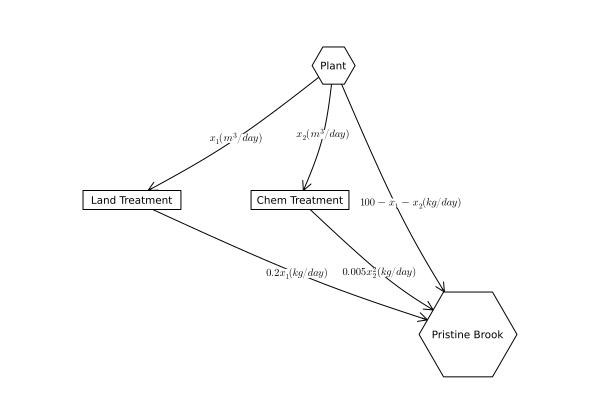

YUK = [18.125 18.5 19.125 20.0 21.125 22.5 24.125 26.0 28.125 30.5 33.125]
Cost = [318.75 290.0 263.75 240.0 218.75 200.0 183.75 170.0 158.75 150.0 143.75]


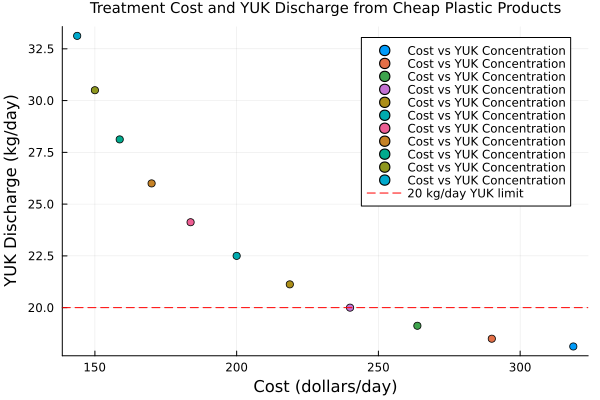

In [120]:
A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict((1, 2) => L"x_1 (m^3 / day)", (1,3) => L"x_2 (m^3 / day)", (1, 4) => L"\qquad\qquad  100 - x_1-x_2 (kg/day)",(2, 4) => L"0.2x_1 (kg/day)",(3, 4) => L"0.005x_2^2 (kg/day)")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

p = graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)
display(p)

# Creating arrays to test my function
x = [75 70 65 60 55 50 45 40 35 30 25]
y = [25 30 35 40 45 50 55 60 65 70 75]
# Implementing function based on derived equations
function treatment_model(x,y)
    YUK_discharged = (0.2*x) + (0.005*y^2) + (100-x-y)
    Cost = x^2/20 + 1.5*y
    return YUK_discharged, Cost;
end

# Calling function and using broadcasting to input arrays
output = treatment_model.(x,y)
YUK = [out[1] for out in output]
Cost = [out[2] for out in output]

@show YUK
@show Cost

# Plots results
scatter((Cost, YUK), label = "Cost vs YUK Concentration", title = "Treatment Cost and YUK Discharge from Cheap Plastic Products", titlefont = font(10))
hline!([20], color=:red, linestyle=:dash, label = "20 kg/day YUK limit")
xlabel!("Cost (dollars/day)")
ylabel!("YUK Discharge (kg/day)")

The cheapest wastewater allocation that satisfies the YUK effluent standard of 20 kg/day is $60 \text{m}^3\text{/day}$ to method 1 and $40 \text{m}^3\text{/day}$ to method 2. With this allocation, the YUK concentration entering Pristine Brook is exactly $20 \text{kg}\text{/day}$ and the resulting cost for this allocation is $240 per day

As cost increases, YUK discharged into Pristine brook decreases. That is to say that the better treatment method is more costly. To find an "optimal solution" without guessing and checking, one could write a script that loops through all possible combinations of wastewater allocations with the two given constraints ($100 \text{m}^3\text{/day}$ exiting the treatment plant, and YUK concentration entering Pristine Brook is to be no greater than $20 \text{kg}\text{/day}$). The script would store the lowest price per day of each wastewater allocation combination that it runs through and therefore arrive at the optimal solution.

**In this problem**:

-   Formulate a mathematical model for the treatment cost and the amount
    of YUK that will be discharged into Pristine Brook based on the
    wastewater allocations. This is best done with some equations and
    supporting text explaining the derivation. Make sure you include, as
    additional equations in the model, any needed constraints on
    relevant values. You can find some basics on writing mathematical
    equations using the LaTeX typesetting syntax
    [here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
    and a cheatsheet with LaTeX commands can be found on the course
    website’s [Resources
    page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

-   Implement your systems model as a Julia function which computes the
    resulting YUK concentration and cost for a particular treatment
    plan. You can return multiple values from a function with a
    [tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1),
    as in:

    ``` {julia}
    function multiple_return_values(x, y)
        return (x+y, x*y)
    end

    a, b = multiple_return_values(2, 5)
    @show a;
    @show b;
    ```

    To evalute the function over vectors of inputs, you can *broadcast*
    the function by adding a decimal `.` before the function arguments
    and accessing the resulting values by writing a *comprehension* to
    loop over the individual outputs in the vector:

    ``` {julia}
    x = [1, 2, 3, 4, 5]
    y = [6, 7, 8, 9, 10]

    output = multiple_return_values.(x, y)
    a = [out[1] for out in output]
    b = [out[2] for out in output]
    @show a;
    @show b;
    ```

    Make sure you comment your code appropriately to make it clear what
    is going on and why.

-   Use your function to experiment with some different combinations of
    wastewater discharge and treatment and plot the results of these
    experiments. Can you find one that satisfies the YUK effluent
    standard (plot this as well as a dashed red line)? What was the
    cost? What can you say about the tradeoff between treatment cost and
    YUK concentration? You don’t have to find an “optimal” solution to
    this problem, but what do you think would be needed to find a better
    solution?

### Problem 5 (10 points)

**This problem is only required for students in BEE 5750**.

In [121]:
#### Problem 5.1

Using a
[comprehension](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#comprehensions),
count the number of odd numbers between 0 and 149.

UndefVarError: UndefVarError: `Using` not defined

> **Hint**
>
> `iseven()` returns `true` for even numbers and `false` for odd
> numbers.

#### Problem 5.2

Write a function `polynomial(x, a)` which calculates the polynomial
$$p(x) = \sum_{i=1}^n a_i x^i$$

based on a point `x` and a coefficient vector `a` of length `n` using a
loop. Test your function by computing $$p(x) = 2x^3 - x^2 + 1$$ at
$x=2$.

## References

List any external references consulted, including classmates.

Googled: function in julia that removes duplicates from an array
    Found unique function on this julia discourse forum: https://discourse.julialang.org/t/r-function-duplicated/91707/9

Citation: https://www.overleaf.com/learn/latex/Line_breaks_and_blank_spaces

Plotting resources:
https://discourse.julialang.org/t/how-to-change-font-size-in-plots-jl/18401

https://docs.juliaplots.org/latest/tutorial/

Consulated classmates Bailey Belinger and Priya Shah
